In [1]:
# Importar librerias del proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import requests
import os
from datetime import datetime

# Configuración de estilo de gráficos
sns.set(style="whitegrid")

In [2]:

import os
import pandas as pd

# Obtener la ruta absoluta del directorio de trabajo actual
notebook_dir = os.getcwd()

# Construir la ruta absoluta al archivo latest_output.txt
latest_output_path = os.path.abspath(os.path.join(notebook_dir, '..', '..', '..', 'datafilecsv', 'latest_output.txt'))

# Verificar si el archivo latest_output.txt existe antes de intentar abrirlo
if not os.path.exists(latest_output_path):
    raise FileNotFoundError(f"No se encontró el archivo: {latest_output_path}")

# Obtener nombre del CSV a analizar desde el txt generado por "data_extraction.py"
with open(latest_output_path, "r") as file:
    csv_filename = file.read().strip()

# Mostrar el nombre del archivo CSV para verificar
print(f"Nombre del archivo CSV para analizar: {csv_filename}")

# Construir la ruta absoluta al archivo CSV
csv_file_path = os.path.abspath(os.path.join(notebook_dir, '..', '..', '..', 'datafilecsv', csv_filename))

# Verificar si el archivo CSV existe antes de intentar cargarlo
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"No se encontró el archivo CSV: {csv_file_path}")

# Cargar el archivo CSV
df = pd.read_csv(csv_file_path)

# Mostrar las primeras filas del dataframe
df.head()


Nombre del archivo CSV para analizar: C:\Datos\git_eurostat\eurostat\scripts\..\datafilecsv\prc_hicp_manr_03-09-2024.csv


,geo,time,value,index,coicop
0,BE,0,2.1,1997-01,All-items HICP
1,BE,1,1.9,1997-02,All-items HICP
2,BE,2,1.3,1997-03,All-items HICP
3,BE,3,1.1,1997-04,All-items HICP
4,BE,4,1.4,1997-05,All-items HICP


In [3]:
# Describir los datos para obtener estadísticas generales
df.describe()

,time,value
count,304511.000000,304511.000000
mean,201.374732,3.320040
std,94.075314,7.342826
min,0.000000,-67.500000
25%,125.000000,0.100000
50%,226.000000,1.900000
75%,281.000000,4.700000
max,331.000000,210.000000


In [4]:
# Verificar valores nulos en el conjunto de datos
df.isnull().sum()

geo       0
time      0
value     0
index     0
coicop    0
dtype: int64

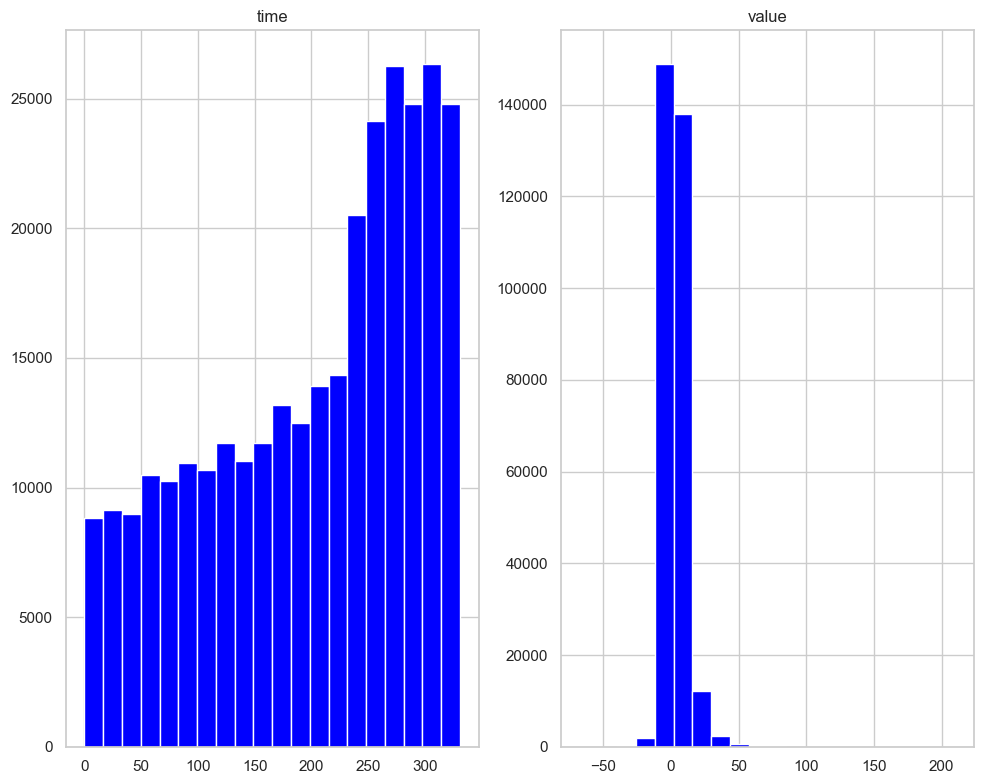

In [5]:
# Generar un histograma para las columnas numéricas
df.hist(figsize=(10, 8), bins=20, color='blue')
plt.tight_layout()
plt.savefig("histogram.png")  # Guardar el histograma
plt.show()

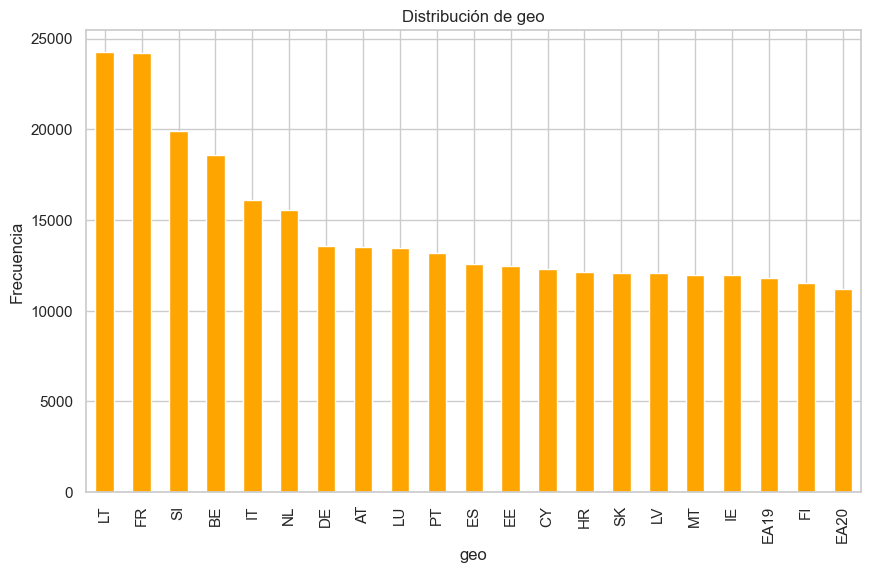

In [6]:
# Parametro a describir

tmpcolumna = 'geo'

# Crear un gráfico de barras para una categoría relevante
if tmpcolumna in df.columns:  # Reemplaza 'Category' con una columna categórica relevante
    df[tmpcolumna].value_counts().plot(kind='bar', color='orange', figsize=(10, 6))
    plt.title(f"Distribución de {tmpcolumna}")
    plt.xlabel(tmpcolumna)
    plt.ylabel('Frecuencia')
    plt.savefig("barplot.png")  # Guardar el gráfico de barras
    plt.show()